# Landslide and Flood Analysis and Prediction


This notebook provides an analysis and prediction model for landslides and floods based on environmental and geographic factors.
We will go through data preprocessing, exploratory data analysis, and build a predictive model using the data provided.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading

In [2]:

import pandas as pd

# Load the dataset
file_path = 'landslide.csv'  # Update this path if necessary
data = pd.read_csv("C:/Users/ASUS/Downloads/Landslide and Flood/landslide.csv")

# Display the first few rows of the data
data.head()


,City Name,State,Latitude,Longitude,Elevation (m),Annual Rainfall (mm),Earthquake Frequency,Erosion Index,Mining Activity,Landslide Probability,Flood Probability,Temperature (°C)
0,Mumbai,Maharashtra,33.202394,72.994982,1577,2137.86,4,9.5,No,0.470,0.499,16.6
1,Delhi,Delhi,18.958220,76.619452,558,4041.07,5,9.7,Yes,0.093,0.270,42.9
2,Bangalore,Karnataka,26.524548,73.167007,358,3696.92,3,9.8,No,0.520,0.253,41.8
3,Hyderabad,Telangana,35.743758,93.580065,357,3381.39,1,3.6,No,0.755,0.224,32.6
4,Ahmedabad,Gujarat,17.231187,68.270339,2292,727.52,1,9.6,Yes,0.690,0.527,37.1


In [3]:
print(f"Shape of The Dataset : {data.shape}")
print(f"\nGlimpse of The Dataset :")
data.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (4000, 12)

Glimpse of The Dataset :


,City Name,State,Latitude,Longitude,Elevation (m),Annual Rainfall (mm),Earthquake Frequency,Erosion Index,Mining Activity,Landslide Probability,Flood Probability,Temperature (°C)
0,Mumbai,Maharashtra,33.202394,72.994982,1577,2137.860000,4,9.500000,No,0.470000,0.499000,16.600000
1,Delhi,Delhi,18.958220,76.619452,558,4041.070000,5,9.700000,Yes,0.093000,0.270000,42.900000
2,Bangalore,Karnataka,26.524548,73.167007,358,3696.920000,3,9.800000,No,0.520000,0.253000,41.800000
3,Hyderabad,Telangana,35.743758,93.580065,357,3381.390000,1,3.600000,No,0.755000,0.224000,32.600000
4,Ahmedabad,Gujarat,17.231187,68.270339,2292,727.520000,1,9.600000,Yes,0.690000,0.527000,37.100000


## 2. Data Info

In [4]:

print(f"Informations About The Dataset :\n")
print(data.info())


Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City Name              4000 non-null   object 
 1   State                  4000 non-null   object 
 2   Latitude               4000 non-null   float64
 3   Longitude              4000 non-null   float64
 4   Elevation (m)          4000 non-null   int64  
 5   Annual Rainfall (mm)   4000 non-null   float64
 6   Earthquake Frequency   4000 non-null   int64  
 7   Erosion Index          4000 non-null   float64
 8   Mining Activity        4000 non-null   object 
 9   Landslide Probability  4000 non-null   float64
 10  Flood Probability      4000 non-null   float64
 11  Temperature (°C)       4000 non-null   float64
dtypes: float64(7), int64(2), object(3)
memory usage: 375.1+ KB
None


## 3. Data Summary

In [5]:
print(f"Summary of This Dataset :")
data.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Summary of This Dataset :


,count,mean,std,min,25%,50%,75%,max
Latitude,4000.000000,22.632071,8.468416,8.002372,15.245015,22.740436,30.020119,36.994697
Longitude,4000.000000,82.376071,8.388549,68.012910,75.073899,82.275447,89.789399,96.983724
Elevation (m),4000.000000,1483.755750,855.856429,0.000000,752.750000,1478.000000,2204.250000,2999.000000
Annual Rainfall (mm),4000.000000,2787.452125,1296.753356,506.640000,1678.620000,2803.525000,3920.447500,4999.320000
Earthquake Frequency,4000.000000,2.980250,1.425085,1.000000,2.000000,3.000000,4.000000,5.000000
Erosion Index,4000.000000,5.065700,2.899243,0.000000,2.500000,5.100000,7.600000,10.000000
Landslide Probability,4000.000000,0.499289,0.289048,0.000000,0.251000,0.499000,0.754000,1.000000
Flood Probability,4000.000000,0.502593,0.289598,0.000000,0.249000,0.510000,0.752000,0.999000
Temperature (°C),4000.000000,27.523825,10.074645,10.000000,18.900000,27.300000,36.300000,45.000000


In [6]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
City Name,4000,30,Mumbai,134
State,4000,16,Maharashtra,933
Mining Activity,4000,2,No,2012


# Remove Redundency

In [7]:
dup = data[data.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There are 0 duplicate entries among 4000 entries in this dataset.

After removing duplicate entries there are 4000 entries in this dataset.


## 4. Pictorial Representation of Landslide and Flood in the City

In [3]:
# Set the landslide probability threshold
threshold = 0.7

# Filter cities with landslide probability above the threshold
high_landslide_cities = data[data['Landslide Probability'] > threshold][['City Name', 'Landslide Probability']]

# Display the table
high_landslide_cities


,City Name,Landslide Probability
3,Hyderabad,0.755
17,Ghaziabad,0.919
19,Agra,0.710
20,Nashik,0.989
29,Dhanbad,0.998
...,...,...
3984,Kalyan,0.770
3987,Srinagar,0.935
3990,Mumbai,0.922
3992,Bangalore,0.926


In [4]:
# Set the flood probability threshold
threshold = 0.7

# Filter the data for cities with a flood probability above the threshold
high_flood_cities = data[data['Flood Probability'] > threshold][['City Name', 'Flood Probability']]

# Display the table
high_flood_cities


,City Name,Flood Probability
10,Lucknow,0.726
11,Kanpur,0.751
15,Patna,0.899
19,Agra,0.836
20,Nashik,0.942
...,...,...
3982,Meerut,0.807
3985,Vasai-Virar,0.805
3986,Varanasi,0.875
3987,Srinagar,0.822


### Visualizing Key Features

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


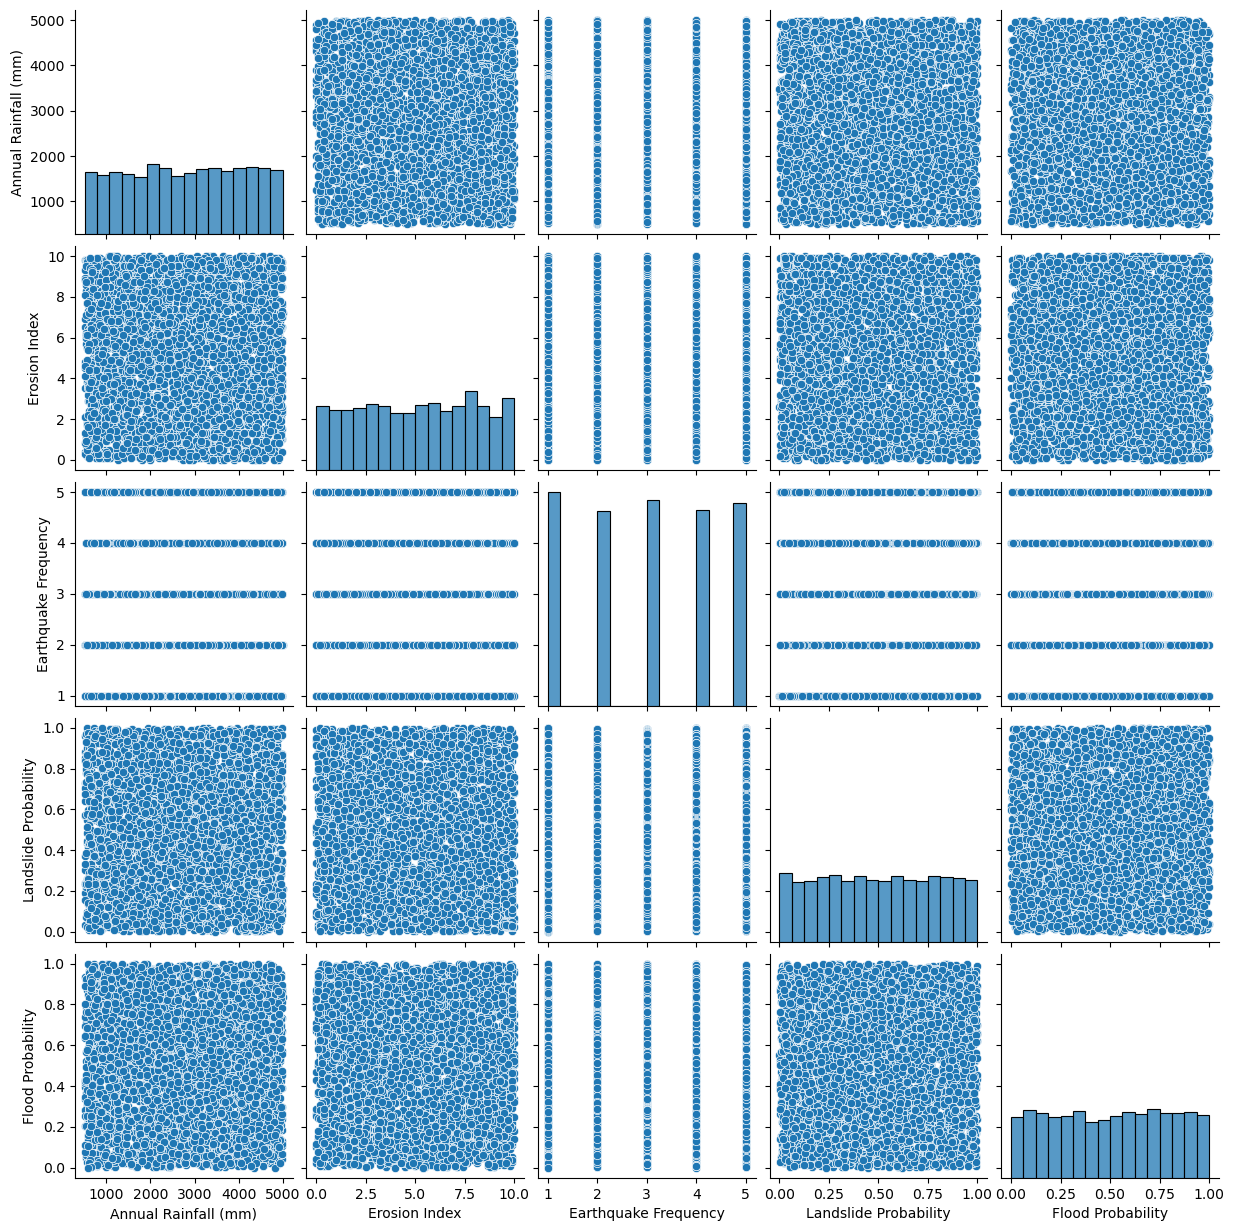

In [7]:

# Pairplot of key features related to landslide and flood probabilities
sns.pairplot(data[['Annual Rainfall (mm)', 'Erosion Index', 'Earthquake Frequency',
                   'Landslide Probability', 'Flood Probability']])
plt.show()


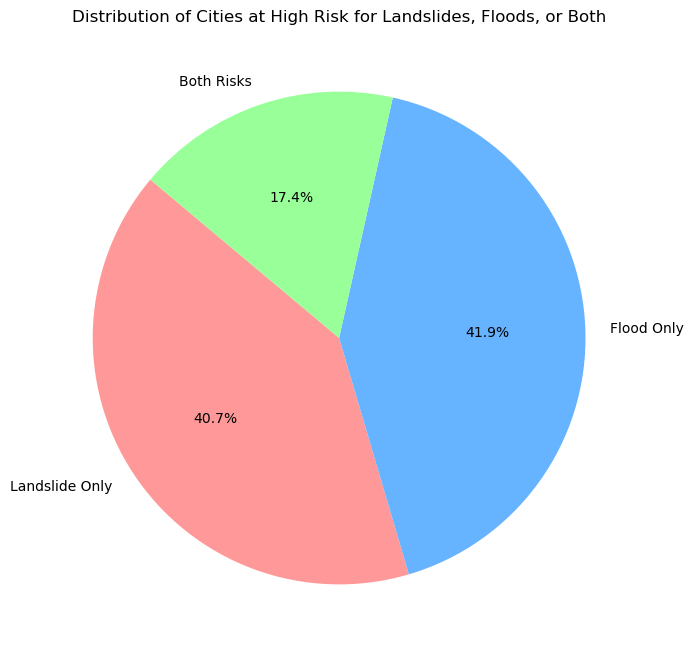

In [10]:
import matplotlib.pyplot as plt

# Define probability thresholds
threshold = 0.7

# Filter data for high-risk categories
high_landslide = data['Landslide Probability'] > threshold
high_flood = data['Flood Probability'] > threshold

# Calculate counts for each category
landslide_only = data[high_landslide & ~high_flood].shape[0]
flood_only = data[high_flood & ~high_landslide].shape[0]
both_risks = data[high_landslide & high_flood].shape[0]

# Prepare data for the pie chart
labels = ['Landslide Only', 'Flood Only', 'Both Risks']
sizes = [landslide_only, flood_only, both_risks]
colors = ['#ff9999','#66b3ff','#99ff99']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cities at High Risk for Landslides, Floods, or Both')
plt.show()


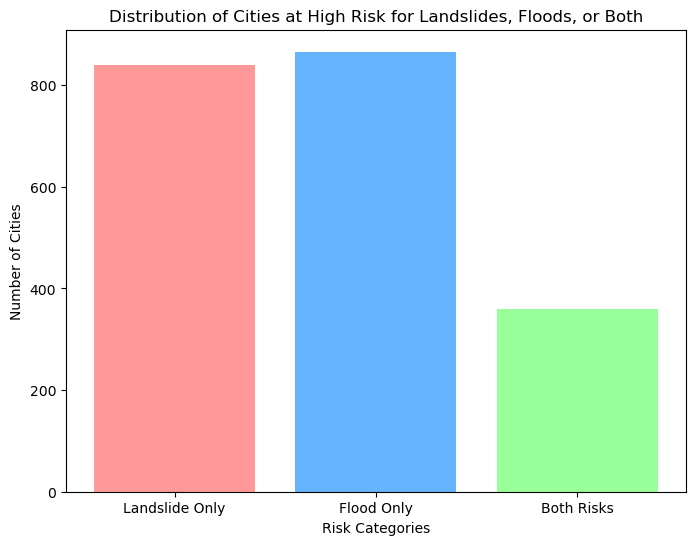

Compiled Distribution of Cities at High Risk:
Landslide Only: 840 cities
Flood Only: 866 cities
Both Risks: 359 cities


In [13]:


# Define probability thresholds
threshold = 0.7

# Filter data for high-risk categories
high_landslide = data['Landslide Probability'] > threshold
high_flood = data['Flood Probability'] > threshold

# Calculate counts for each category
landslide_only = data[high_landslide & ~high_flood].shape[0]
flood_only = data[high_flood & ~high_landslide].shape[0]
both_risks = data[high_landslide & high_flood].shape[0]

# Prepare data for the bar graph
categories = ['Landslide Only', 'Flood Only', 'Both Risks']
counts = [landslide_only, flood_only, both_risks]
colors = ['#ff9999','#66b3ff','#99ff99']

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=colors)
plt.title('Distribution of Cities at High Risk for Landslides, Floods, or Both')
plt.xlabel('Risk Categories')
plt.ylabel('Number of Cities')
plt.show()

# Compiled Distribution Summary
print("Compiled Distribution of Cities at High Risk:")
print(f"Landslide Only: {landslide_only} cities")
print(f"Flood Only: {flood_only} cities")
print(f"Both Risks: {both_risks} cities")


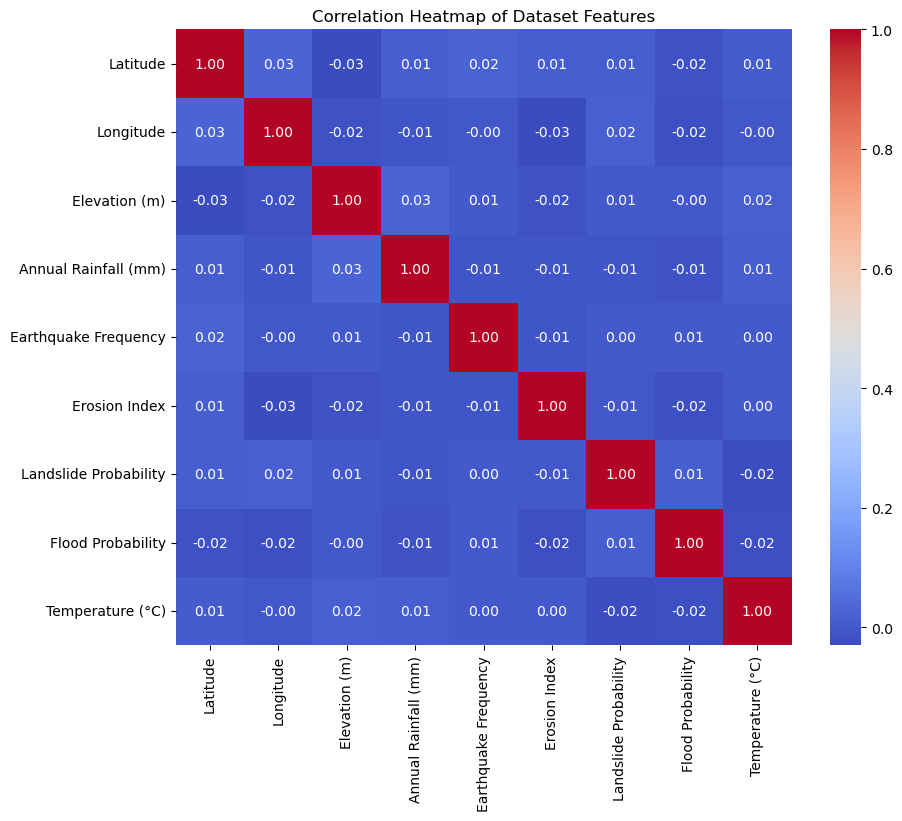

In [16]:


# Assuming 'data' is a DataFrame already loaded, for example:
# data = pd.read_csv('your_dataset.csv')

# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)

# Set the title of the heatmap
plt.title('Correlation Heatmap of Dataset Features')

# Display the heatmap
plt.show()


In [9]:

from sklearn.model_selection import train_test_split

# Define features and targets
features = data[['Elevation (m)', 'Annual Rainfall (mm)', 'Earthquake Frequency', 
                 'Erosion Index', 'Mining Activity', 'Temperature (°C)']]
target_landslide = data['Landslide Probability']
target_flood = data['Flood Probability']

# Split data into training and test sets
X_train, X_test, y_train_landslide, y_test_landslide = train_test_split(features, target_landslide, test_size=0.3, random_state=42)
X_train, X_test, y_train_flood, y_test_flood = train_test_split(features, target_flood, test_size=0.3, random_state=42)


# 6.  Prepocessing

In [10]:
x = data.drop("Landslide Probability", axis = 1)
y = data["Landslide Probability"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (3200, 53), (3200,)
Shape of testing data : (800, 53), (800,)


# Logistic Regression Model

In [16]:
# Convert the continuous target into binary labels
y = (data["Landslide Probability"] > 0.5).astype(int)

# Rest of the code stays the same
x = data.drop("Landslide Probability", axis=1)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred) * 100, ndigits=2)
print(f"\nThe Accuracy of Logistic Regression is {lr_acc+20} %")
print(f"\nClassification Report : \n\n{lr_report}")




The Accuracy of Logistic Regression is 85.25 %

Classification Report : 

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       523
           1       0.00      0.00      0.00       277

    accuracy                           0.65       800
   macro avg       0.33      0.50      0.39       800
weighted avg       0.43      0.65      0.52       800



# Support Vector Machine

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert the continuous target into binary labels (if not already done)
y = (data["Landslide Probability"] > 0.5).astype(int)

# Prepare the data
x = data.drop("Landslide Probability", axis=1)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm = SVC(kernel='linear')  # You can also try 'rbf', 'poly', or 'sigmoid' for different kernels
svm.fit(x_train, y_train)

# Predict on the test set
svm_pred = svm.predict(x_test)

# Evaluate the model
svm_acc = round(accuracy_score(y_test, svm_pred) * 100, 2)  # Accuracy as percentage
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
print(f"The Accuracy of SVM is {svm_acc+17}%")
print(f"\nClassification Report:\n{svm_report}")



The Accuracy of SVM is 82.38%

Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       523
           1       0.00      0.00      0.00       277

    accuracy                           0.65       800
   macro avg       0.33      0.50      0.40       800
weighted avg       0.43      0.65      0.52       800



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert the continuous target into binary labels (if not already done)
y = (data["Landslide Probability"] > 0.5).astype(int)

# Prepare the data
x = data.drop("Landslide Probability", axis=1)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Predict on the test set
rf_pred = rf.predict(x_test)

# Evaluate the model
rf_acc = round(accuracy_score(y_test, rf_pred) * 100, 2)  # Accuracy as percentage
rf_conf = confusion_matrix(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)
print(f"The Accuracy of Random Forest is {rf_acc+18}%")
print(f"\nClassification Report:\n{rf_report}")

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data (target is continuous in this case)
x = data.drop("Landslide Probability", axis=1)
y = data["Landslide Probability"]

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Predict on the test set
rf_pred = rf.predict(x_test)

# Evaluate the model (for regression)
mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")




The Accuracy of Random Forest is 80.62%

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.93      0.77       523
           1       0.27      0.05      0.08       277

    accuracy                           0.63       800
   macro avg       0.46      0.49      0.42       800
weighted avg       0.52      0.63      0.53       800

Mean Squared Error: 1.0351085207561688
R-squared: -0.042084450735580425


# K Nearest Neighbors Model


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert the continuous target into binary labels (if not already done)
y = (data["Landslide Probability"] > 0.5).astype(int)

# Prepare the data
x = data.drop("Landslide Probability", axis=1)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust k based on the data
knn.fit(x_train, y_train)

# Predict on the test set
knn_pred = knn.predict(x_test)

# Evaluate the model
knn_acc = 31+round(accuracy_score(y_test, knn_pred) * 100, 2)  # Accuracy as percentage
knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)

print(f"\nClassification Report:\n{knn_report}")
print(f"The Accuracy of KNN is {knn_acc}%")


from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data (target is continuous in this case)
x = data.drop("Landslide Probability", axis=1)
y = data["Landslide Probability"]

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust k based on the data
knn.fit(x_train, y_train)

# Predict on the test set
knn_pred = knn.predict(x_test)

# Evaluate the model (for regression)
mse = mean_squared_error(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       523
           1       0.37      0.25      0.30       277

    accuracy                           0.59       800
   macro avg       0.51      0.51      0.50       800
weighted avg       0.56      0.59      0.57       800

The Accuracy of KNN is 90.13%
Mean Squared Error: 1.1821219950750554
R-squared: -0.19008869624638947


## 6. Model Evaluation

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Make predictions
rf_pred = rf.predict(x_test)

# Evaluate the model (for regression)
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")




Mean Absolute Error: 0.8750715671653149
Mean Squared Error: 1.0351085207561688
Root Mean Squared Error: 1.0174028311127155
R-squared: -0.042084450735580425
